In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [134]:
training_df = pd.read_csv('weatherAUS.csv')

In [135]:
training_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [136]:
training_df['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Hobart              3193
Perth               3193
Adelaide            3193
Brisbane            3193
Melbourne           3193
AliceSprings        3040
GoldCoast           3040
Cairns              3040
Wollongong          3040
MountGambier        3040
Bendigo             3040
Launceston          3040
Townsville          3040
Albury              3040
Albany              3040
Ballarat            3040
MountGinini         3040
Newcastle           3039
Penrith             3039
Tuggeranong         3039
Cobar               3009
Watsonia            3009
Sale                3009
SydneyAirport       3009
PerthAirport        3009
MelbourneAirport    3009
WaggaWagga          3009
Dartmoor            3009
Witchcliffe         3009
Richmond            3009
Nuriootpa           3009
CoffsHarbour        3009
Moree               3009
Portland            3009
NorfolkIsland       3009
Mildura             3009
Woomera             3009


In [137]:
training_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [138]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [139]:
training_df.duplicated().sum()

0

In [140]:
training_df['Date'] = pd.to_datetime(training_df['Date'], infer_datetime_format=True)
training_df['Day'] = training_df['Date'].dt.day.astype('int32')
training_df['Month'] = training_df['Date'].dt.month.astype('int32')
training_df['Year'] = training_df['Date'].dt.year.astype('int32')

training_df.drop(columns=['Date'], inplace=True)

In [141]:
training_df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [142]:
training_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,15.712258,6.399615,2012.769751
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,8.794789,3.427262,2.537684
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,8.000000,3.000000,2011.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,16.000000,6.000000,2013.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,23.000000,9.000000,2015.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,31.000000,12.000000,2017.000000


In [143]:
training_df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Day                  0
Month                0
Year                 0
dtype: int64

In [144]:
# Checking data completeness
missing = pd.DataFrame(training_df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(training_df)).round(2)*100
missing

,no.of missing values,% missing_values
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0
WindDir3pm,4228,3.0


In [145]:
training_df=training_df.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'], axis=1)

In [146]:
# Remove rows where target variables are missing
training_df.dropna(how='all', subset=['RainTomorrow'], inplace=True) 

In [147]:
training_df.loc[(training_df['RainToday'] == 'Yes') & (training_df['Rainfall'] <= 1)]

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year


In [148]:
#tratamento dos valores nulos
categorical_cols = list(training_df.select_dtypes(include=['object']).columns)
for i in categorical_cols:
    training_df[i].fillna(training_df[i].mode()[0], inplace=True)   

continuous_cols = list(training_df.select_dtypes(include=['float64']).columns)
for column in continuous_cols:
   training_df[column].fillna(training_df[column].median(), inplace = True)
training_df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

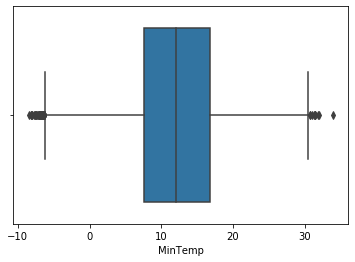

In [149]:
sns.boxplot(x=training_df['MinTemp'])

In [150]:
for x in ['MinTemp']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit

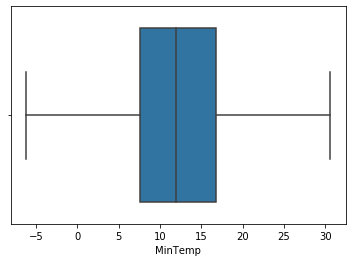

In [151]:
sns.boxplot(x=training_df['MinTemp'])

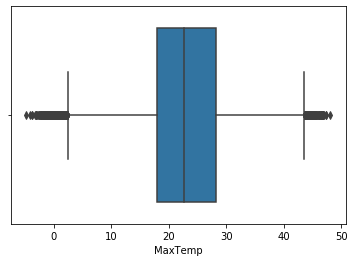

In [152]:
sns.boxplot(x=training_df['MaxTemp'])

In [153]:
for x in ['MaxTemp']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit

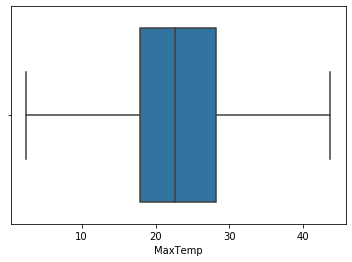

In [154]:
sns.boxplot(x=training_df['MaxTemp'])

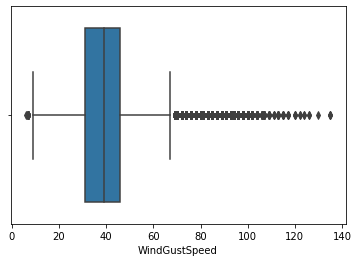

In [155]:
sns.boxplot(x=training_df['WindGustSpeed'])

In [156]:
for x in ['WindGustSpeed']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit

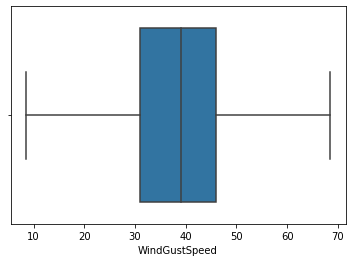

In [157]:
sns.boxplot(x=training_df['WindGustSpeed'])

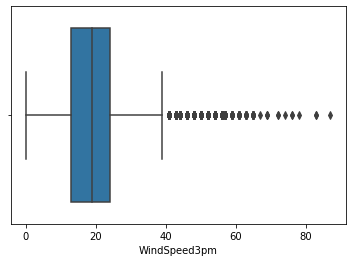

In [158]:
sns.boxplot(x=training_df['WindSpeed3pm'])

In [159]:
for x in ['WindSpeed3pm']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit

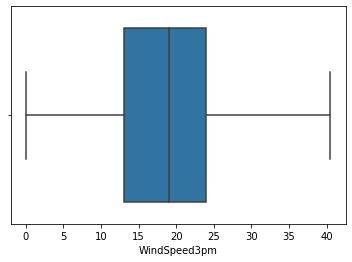

In [160]:
sns.boxplot(x=training_df['WindSpeed3pm'])

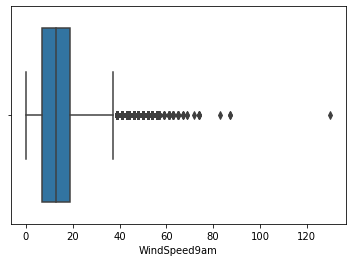

In [161]:
sns.boxplot(x=training_df['WindSpeed9am'])

In [162]:
for x in ['WindSpeed9am']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit

In [163]:
sns.boxplot(x=training_df['WindSpeed9am'])

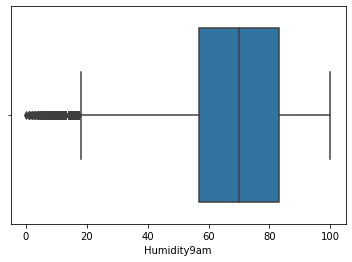

In [ ]:
sns.boxplot(x=training_df['Humidity9am'])

In [ ]:
for x in ['Humidity9am']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit

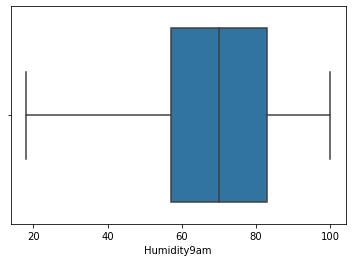

In [ ]:
sns.boxplot(x=training_df['Humidity9am'])

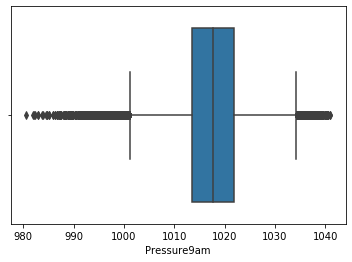

In [ ]:
sns.boxplot(x=training_df['Pressure9am'])

In [ ]:
for x in ['Pressure9am']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit

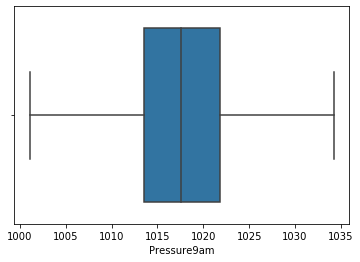

In [ ]:
sns.boxplot(x=training_df['Pressure9am'])

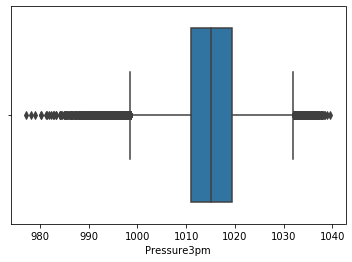

In [ ]:
sns.boxplot(x=training_df['Pressure3pm'])

In [ ]:
for x in ['Pressure3pm']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit

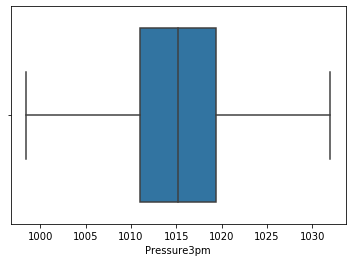

In [ ]:
sns.boxplot(x=training_df['Pressure3pm'])

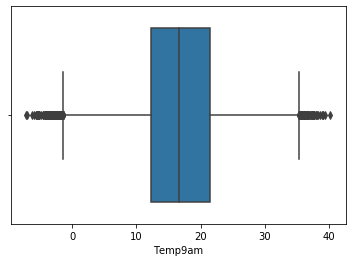

In [ ]:
sns.boxplot(x=training_df['Temp9am'])

In [ ]:
for x in ['Temp9am']:

  q1 = training_df[x].quantile(0.25)
  q3 = training_df[x].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  training_df.loc[training_df[x]<lower_limit, x] = lower_limit
  training_df.loc[training_df[x]>upper_limit, x] = upper_limit

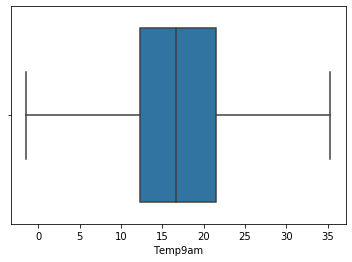

In [ ]:
sns.boxplot(x=training_df['Temp9am'])

In [ ]:
training_df['RainTomorrow'] = training_df['RainTomorrow'].map({'Yes':1, 'No':0})
training_df['RainToday'] = training_df['RainToday'].map({'Yes':1, 'No':0})

In [ ]:
le = preprocessing.LabelEncoder()
training_df['Location'] = le.fit_transform(training_df['Location'])
training_df['WindDir9am'] = le.fit_transform(training_df['WindDir9am'])
training_df['WindDir3pm'] = le.fit_transform(training_df['WindDir3pm'])
training_df['WindGustDir'] = le.fit_transform(training_df['WindGustDir'])

In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  int64  
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  int64  
 7   WindDir3pm     142193 non-null  int64  
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  int64  
 17  RainTomorrow   142193 non-nul

In [ ]:
x = training_df.drop(['RainTomorrow'],axis=1)
y = training_df['RainTomorrow']

/home/pedropereira/anaconda3/envs/envDAA/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


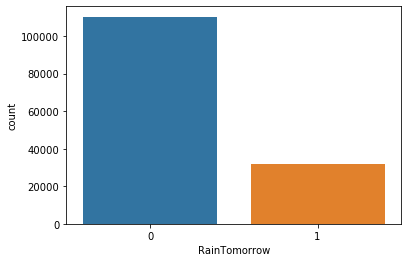

In [ ]:
sns.countplot(training_df["RainTomorrow"])

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=2021, replacement=False)
x,y=rus.fit_resample(x,y)

print(x.shape,y.shape)

(63754, 20) (63754,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2021)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import callbacks
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV,KFold


RANDOM_SEED = 2021

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.2.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=8, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(32, activation = 'relu', input_dim = 20))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8,  activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))

# Compiling the ANN
model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss = 'binary_crossentropy', 
    metrics = ['accuracy']
    )

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
1196/1196 [==============================] - 5s 4ms/step - loss: 4.5748 - accuracy: 0.6805 - val_loss: 0.6216 - val_accuracy: 0.7293
Epoch 2/100
1196/1196 [==============================] - 5s 4ms/step - loss: 0.6224 - accuracy: 0.7165 - val_loss: 0.5411 - val_accuracy: 0.7493
Epoch 3/100
1196/1196 [==============================] - 5s 4ms/step - loss: 0.5673 - accuracy: 0.7309 - val_loss: 0.5097 - val_accuracy: 0.7581
Epoch 4/100
1196/1196 [==============================] - 6s 5ms/step - loss: 0.5414 - accuracy: 0.7409 - val_loss: 0.5033 - val_accuracy: 0.7624
Epoch 5/100
1196/1196 [==============================] - 7s 6ms/step - loss: 0.5317 - accuracy: 0.7432 - val_loss: 0.4922 - val_accuracy: 0.7633
Epoch 6/100
1196/1196 [==============================] - 7s 6ms/step - loss: 0.5248 - accuracy: 0.7490 - val_loss: 0.4832 - val_accuracy: 0.7676
Epoch 7/100
1196/1196 [==============================] - 5s 4ms/step - loss: 0.5163 - accuracy: 0.7521 - val_loss: 0.4797 - val_ac

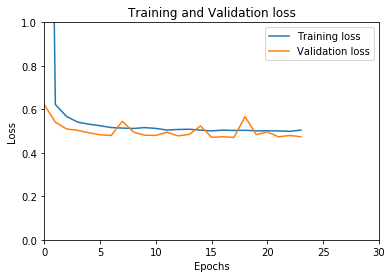

In [ ]:
history_df = pd.DataFrame(history.history)

plt.xlim(0, 30)
plt.ylim(0, 1)
plt.plot(history_df.loc[:, ['loss']], label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [ ]:
predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_test.value_counts()

1    8052
0    7887
Name: RainTomorrow, dtype: int64

/home/pedropereira/anaconda3/envs/envDAA/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


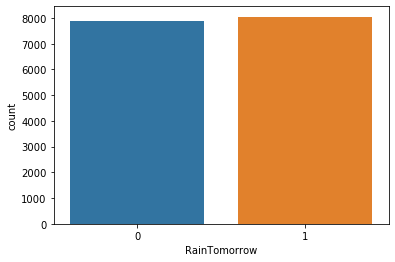

In [ ]:
sns.countplot(y_test)

In [ ]:
predicted

array([[0.6947042 ],
       [0.23565498],
       [0.35342127],
       ...,
       [0.74987227],
       [0.11871039],
       [0.88589865]], dtype=float32)

In [ ]:
for i,x in enumerate(predicted):
    predicted[i][0]= int(round(predicted[i][0]))

pred_df = pd.DataFrame(predicted)
pred_df.value_counts()

0.0    8231
1.0    7708
dtype: int64

In [ ]:
acc = tf.keras.metrics.BinaryAccuracy()

acc.update_state(y_test.to_numpy(),pred_df)
acc.result().numpy()

0.76686114

In [ ]:
cm = confusion_matrix(y_test, pred_df)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

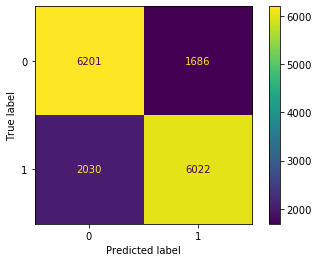

In [ ]:
disp.plot()

In [ ]:
f = open("output.csv","w")
f.write("RowId,RainTomorrow")

data_output = pd.DataFrame(predicted)
data_output.index += 1
data_output.loc[data_output[0] == 0, 0] = 'No'
data_output.loc[data_output[0] == 1, 0] = 'Yes'
data_output.to_csv("output.csv",header=["RainTomorrow"],index_label="RowId",)